In [19]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [20]:
# Downloaded the .csv file from the source, uploaded directly to PUIdata folder
#os.getenv(varname[, value])
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA")+
                               "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [21]:
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [72]:
# Downloaded the .csv file from the source, uploaded directly to PUIdata folder
#os.getenv(varname[, value])
#def getzip():
    #os.system("mkdir " + os.getenv("PUIDATA")+"/Manhattan")
    #os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
    #os.system("mv " + "mn_mappluto_16v1.zip" + os.getenv("PUIDATA") + "/Manhattan")
    #os.system("unzip " + os.getenv("PUIDATA") + "/Manhattan/" + "mn_mappluto_16v1.zip -d " + os.getenv("PUIDATA")+"/Manhattan")
    #os.system("rm " + os.getenv("PUIDATA") + "/Manhattan/mn_mappluto_16v1.zip")
import zipfile
zf = zipfile.ZipFile(os.getenv("PUIDATA") +"/Manhattan" + "/mn_mappluto_16v1.zip", 'r')
zf.namelist()


['PLUTODD16v1.pdf',
 'MN_Dcp_Mappinglot.dbf',
 'MN_Dcp_Mappinglot.prj',
 'MN_Dcp_Mappinglot.sbn',
 'MN_Dcp_Mappinglot.sbx',
 'MN_Dcp_Mappinglot.shp',
 'MN_Dcp_Mappinglot.shp.xml',
 'MN_Dcp_Mappinglot.shx',
 'mn_pluto.dbf',
 'mn_pluto.dbf.xml',
 'MNMapPLUTO.BBL.atx',
 'MNMapPLUTO.CD.atx',
 'MNMapPLUTO.dbf',
 'MNMapPLUTO.LandUse.atx',
 'MNMapPLUTO.prj',
 'MNMapPLUTO.sbn',
 'MNMapPLUTO.sbx',
 'MNMapPLUTO.shp',
 'MNMapPLUTO.shp.xml',
 'MNMapPLUTO.shx',
 'MNMapPLUTO.ZoneDist1.atx']

In [74]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")
bsize.head()

,geometry
0,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [64]:
bsize.columns

Index([u'geometry'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5170843d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe50775d210>]], dtype=object)

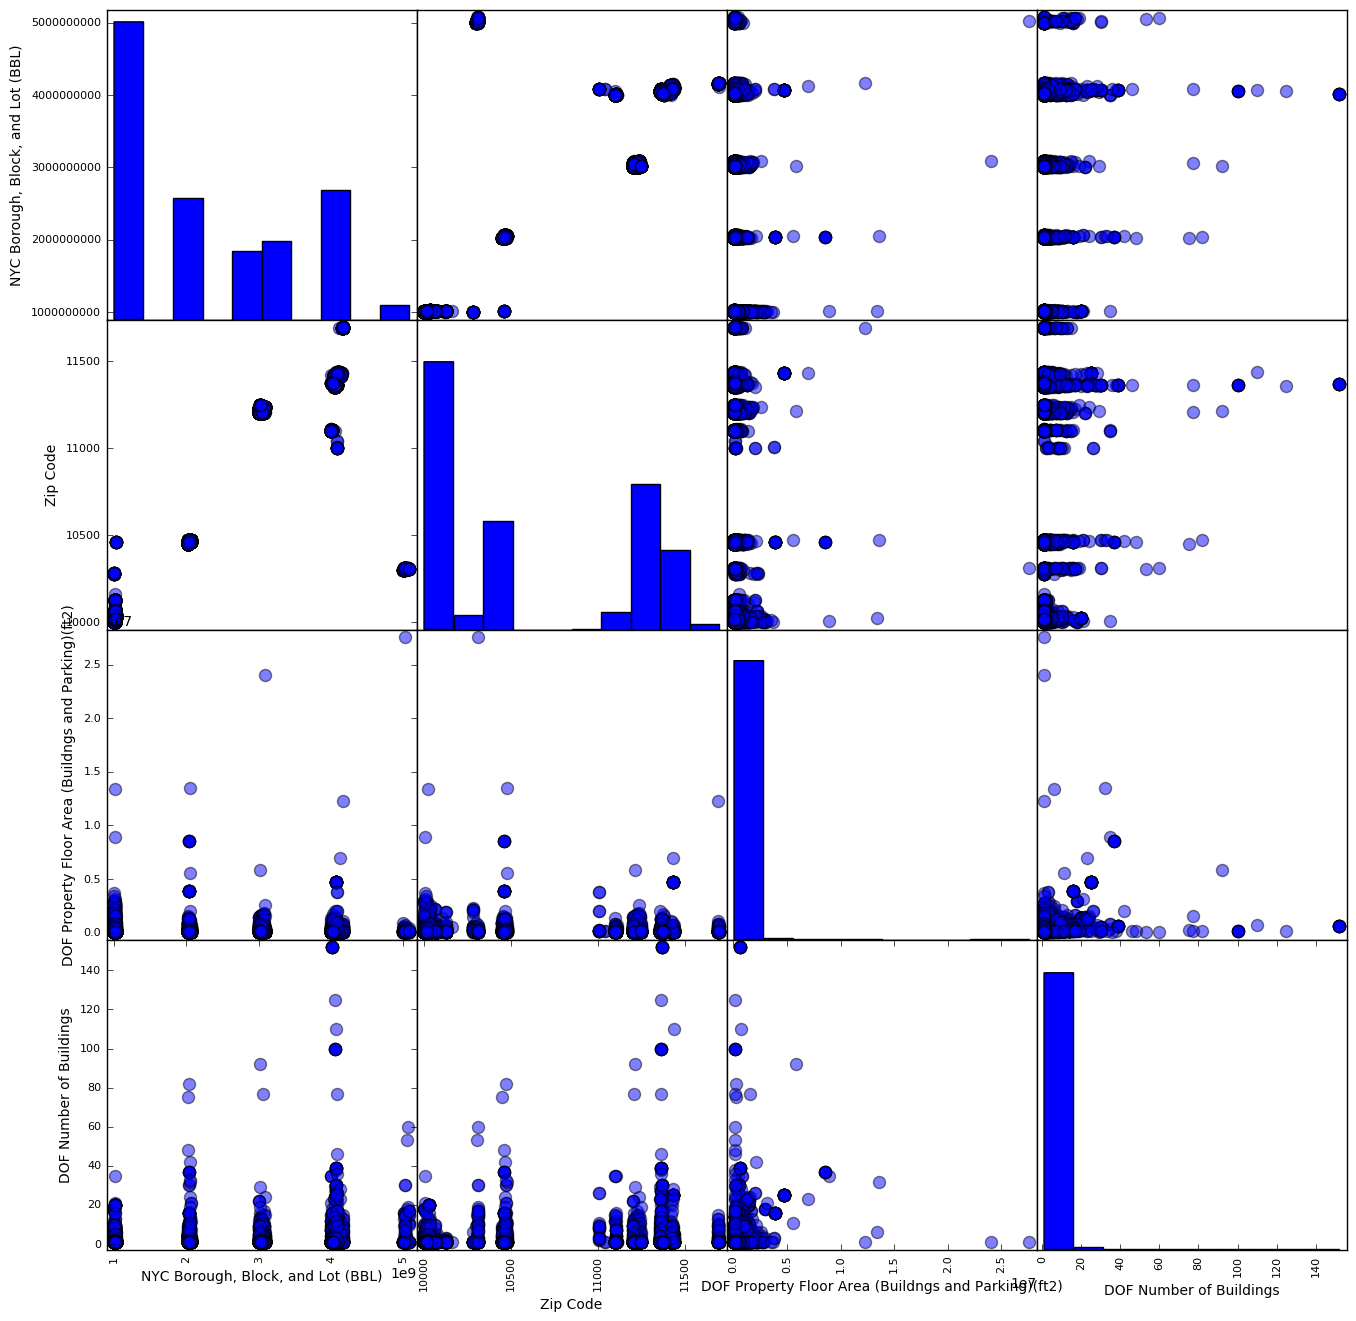

In [6]:
#try make a scatter plot of nrg. Few columns will plot
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [59]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [60]:
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')
#do it for however many columns you need

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [61]:
indx = (np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')
#do it for however many columns you need

invalid entries changed to NaN 15430


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [62]:
#set invalid parts to NAN using pd.to.numeric with coerce
#http://stackoverflow.com/questions/34844711/convert-entire-pandas-dataframe-to-integers-in-pandas-0-17-0
df = pd.DataFrame({'ints': ['nrg', 'bsize']})
df.apply(pd.to_numeric, errors='ignore').info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
ints    2 non-null object
dtypes: object(1)
memory usage: 88.0+ bytes


,ints
0,nrg
1,bsize


In [63]:
##check that your conversion worked: e.g.
print (nrg['Site EUI(kBtu/ft2)'].astype(float))
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
bsize.BBL.astype(float)
#this should not return an error
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!


Record Number
12086      NaN
14354      NaN
12150      NaN
12590      NaN
15591      NaN
12135      NaN
8523       NaN
15920      NaN
14241      NaN
15925      NaN
9685       NaN
7540       NaN
14360      NaN
10588      NaN
14423      NaN
12515      NaN
3028     125.4
14609      NaN
12096      NaN
6666       NaN
8914       NaN
11586      NaN
11714      NaN
14307      NaN
12761      NaN
12091      NaN
16027      NaN
13378      NaN
14911      NaN
15103      NaN
         ...  
14559      NaN
14560      NaN
14748      NaN
14753      NaN
13582      NaN
13947      NaN
14777      NaN
14779      NaN
14409      NaN
13262      NaN
13261      NaN
12523      NaN
12529      NaN
12536      NaN
13929      NaN
13944      NaN
13945      NaN
13821      NaN
13829      NaN
13837      NaN
13838      NaN
13847      NaN
14352      NaN
12976      NaN
12978      NaN
12984      NaN
12987      NaN
12988      NaN
13472      NaN
13482      NaN
Name: Site EUI(kBtu/ft2), dtype: float64


AttributeError: 'GeoDataFrame' object has no attribute 'BBL'